# Wavelets
In this notebook we are going to explore the wavelets methodology.


## 1. Wavelets and pywt library
In wavelets one decompose signals in different levels and amplitudes with regards to a specific (mother or predefined) wavelet. One stretch (scale) and shift (translate) a mother wavelet to capture similarities at different scales (frequency bands).

In [1]:
import math
import pywt
import matplotlib.pyplot as plt
import numpy as np

Let's look at the available mother wavelets in the python package `pywt`. There are two families of available wavelets: discrete and continuous.
The wavelets supported by `pywt` can be explored:
`pywt.families(short=False)`

In [10]:
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [15]:
pywt.wavelist(kind='discrete')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

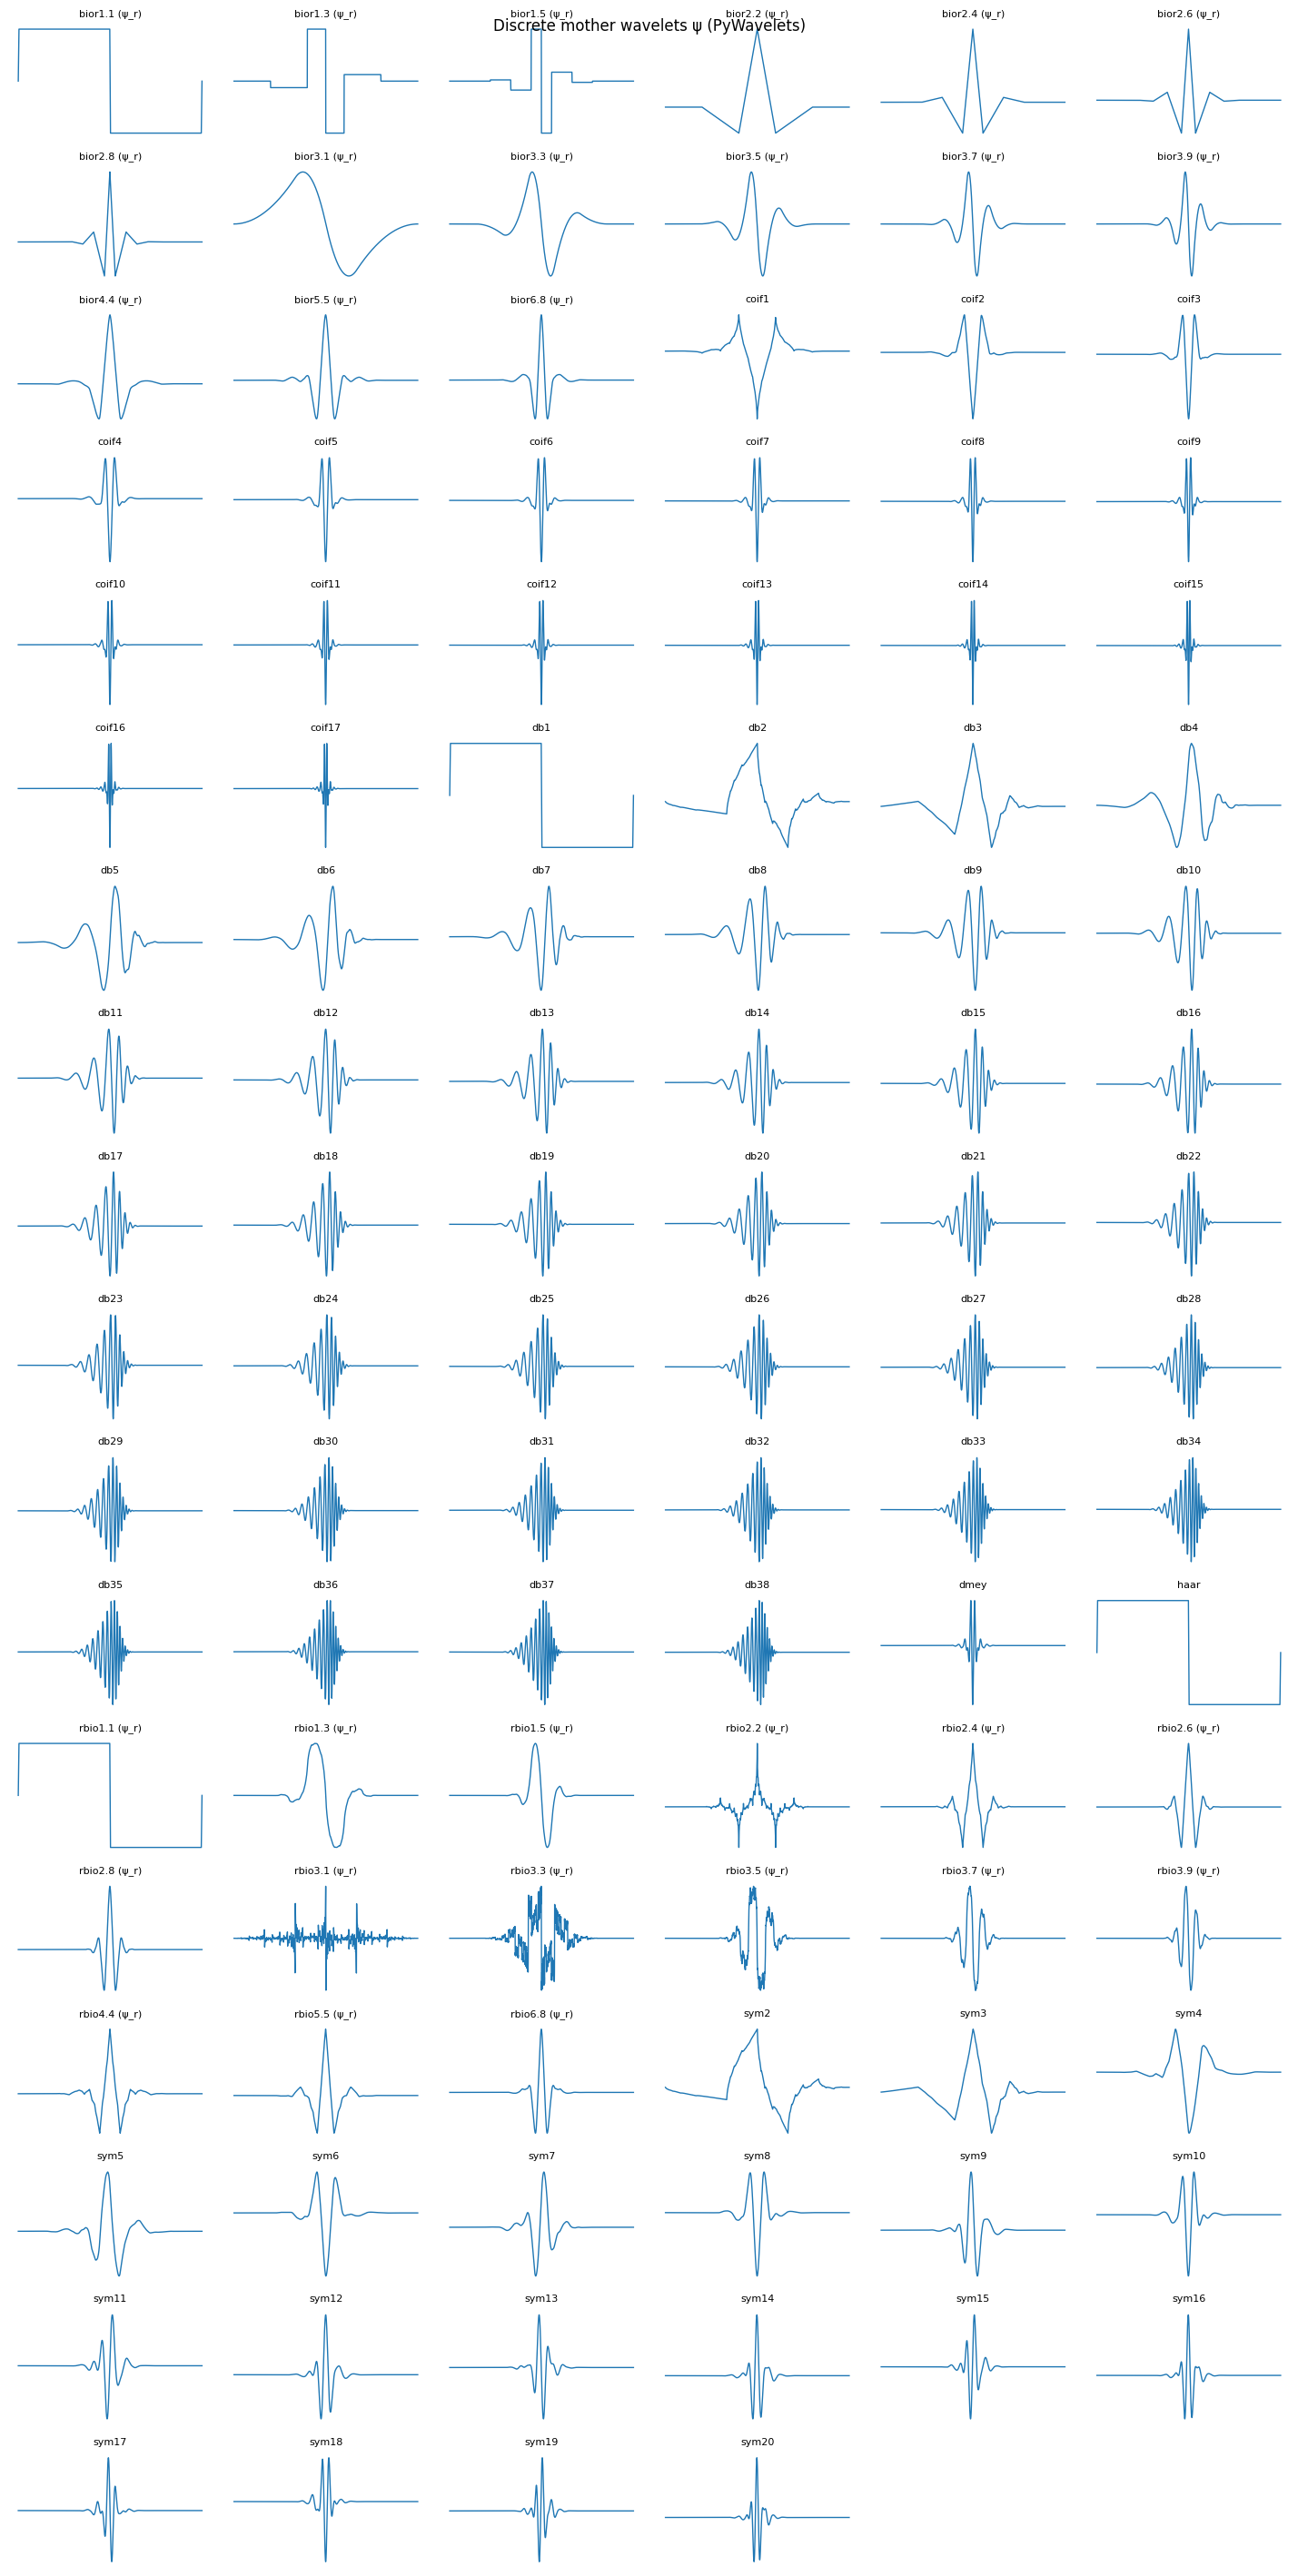

In [ ]:
# Discrete wavelets
LEVEL = 8     # resolution of wavefun() grid: higher -> smoother
NCOLS = 6     # columns of plot
names = pywt.wavelist(kind='discrete')
n = len(names)
nrows = math.ceil(n / NCOLS)

fig, axes = plt.subplots(nrows, NCOLS, figsize=(2.4*NCOLS, 1.6*nrows))
axes = np.atleast_1d(axes).ravel()

for ax, name in zip(axes, names):
    w = pywt.Wavelet(name)
    wf = w.wavefun(level=LEVEL)

    # wavefun returns:
    # - (phi, psi, x) for orthogonal families
    # - (phi_d, psi_d, phi_r, psi_r, x) for biorthogonal families
    if len(wf) == 3:
        _, psi, x = wf
        title = name
    else:
        _, psi_d, _, psi_r, x = wf
        psi = psi_r  # choose reconstruction wavelet for display
        title = f"{name} (ψ_r)"

    ax.plot(x, psi, lw=1)
    ax.set_title(title, fontsize=8)
    ax.set_xticks([]); ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

# turn off any leftover empty axes
for ax in axes[n:]: ax.axis('off')

fig.suptitle("Discrete mother wavelets ψ (PyWavelets)", fontsize=12)
plt.tight_layout()

In [16]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

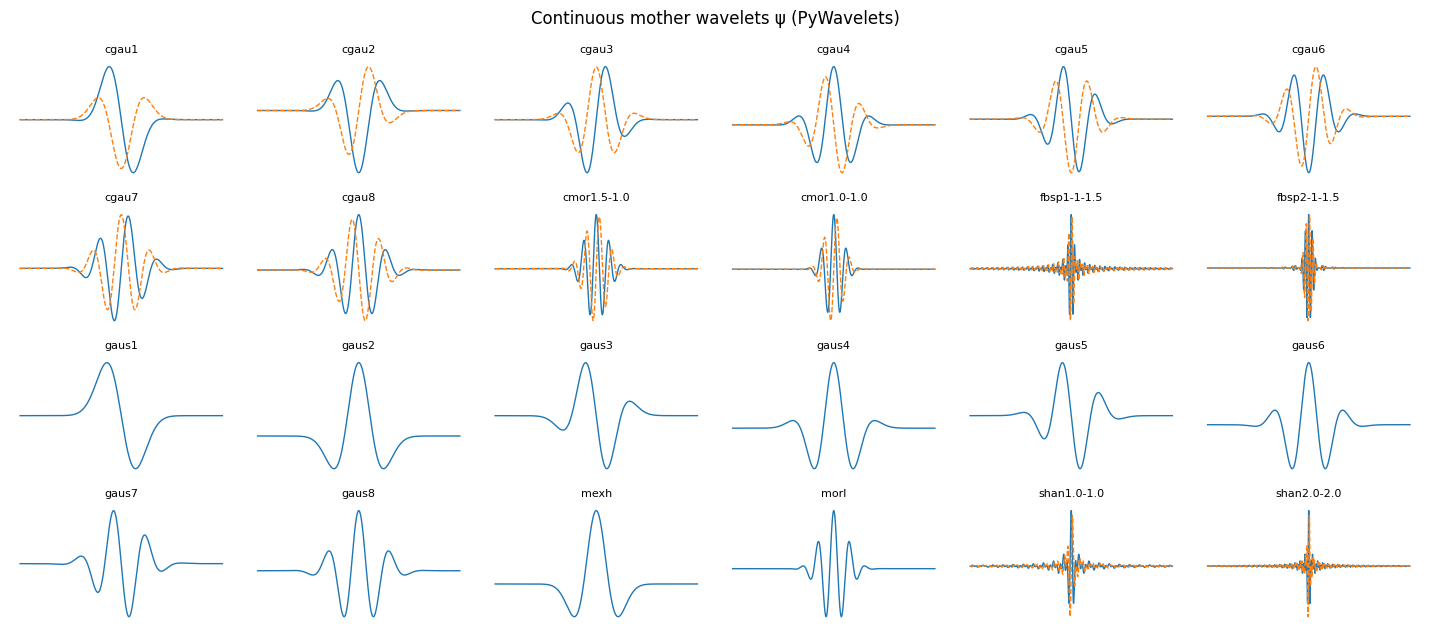

In [ ]:
# Continuous wavelets
LENGTH = 1024  # samples for psi(t)
NCOLS = 6

# Base names from pywt; some families are parameterized and need explicit names.
base = pywt.wavelist(kind='continuous')

# Expand parameterized families with a few nice defaults:
param_defaults = {
    'cmor': ['cmor1.5-1.0', 'cmor1.0-1.0'],
    'shan': ['shan1.0-1.0', 'shan2.0-2.0'],
    'fbsp': ['fbsp1-1-1.5', 'fbsp2-1-1.5'],
}
names = []
for n in base:
    root = n.split('(')[0] if '(' in n else n  # defensive
    if root in param_defaults:
        names.extend(param_defaults[root])
    else:
        names.append(n)

# Create grid
n = len(names)
nrows = math.ceil(n / NCOLS)
fig, axes = plt.subplots(nrows, NCOLS, figsize=(2.4*NCOLS, 1.6*nrows))
axes = np.atleast_1d(axes).ravel()

for ax, name in zip(axes, names):
    try:
        w = pywt.ContinuousWavelet(name)
        psi, x = w.wavefun(length=LENGTH)

        if np.iscomplexobj(psi):    # e.g., complex Morlet (cmor)
            ax.plot(x, psi.real, lw=1, label='Re')
            ax.plot(x, psi.imag, lw=1, ls='--', label='Im')
        else:
            ax.plot(x, psi, lw=1)

        ax.set_title(name, fontsize=8)
        ax.set_xticks([]); ax.set_yticks([])
        for spine in ax.spines.values():
            spine.set_visible(False)
    except Exception as e:
        ax.text(0.5, 0.5, f"Skip\n{name}", ha='center', va='center', fontsize=8)
        ax.axis('off')

# turn off any leftover empty axes
for ax in axes[n:]:
    ax.axis('off')

fig.suptitle("Continuous mother wavelets ψ (PyWavelets)", fontsize=12)
plt.tight_layout()

## 2. Wavelets for dummy time-series
> Advice: do not spend time on this section, go directly to section 3.

In [ ]:
import pickle
with open('../../data/4_time_series.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
times = loaded_data['times']
series = loaded_data['series']

In [3]:
from itertools import combinations
from scipy.spatial.distance import euclidean

def decompose(x, wavelet='db4', level=None):
    if level is None:
        level = pywt.dwt_max_level(len(x), pywt.Wavelet(wavelet).dec_len)
    coeffs = pywt.wavedec(x, wavelet, level=level)
    # coeffs[0] = approximation at coarsest scale, coeffs[1:] = details (from coarse->fine)
    energies = [np.sum(c**2) for c in coeffs]
    return {'coeffs': coeffs, 'energies': np.array(energies), 'wavelet': wavelet, 'level': level}

def flatten_details(coeffs):
    # join detail arrays into single vector (useful for distance)
    details = coeffs[1:]  # skip approximation
    return np.concatenate([np.asarray(d).ravel() for d in details])

/home/luisa/micromamba/envs/ts/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


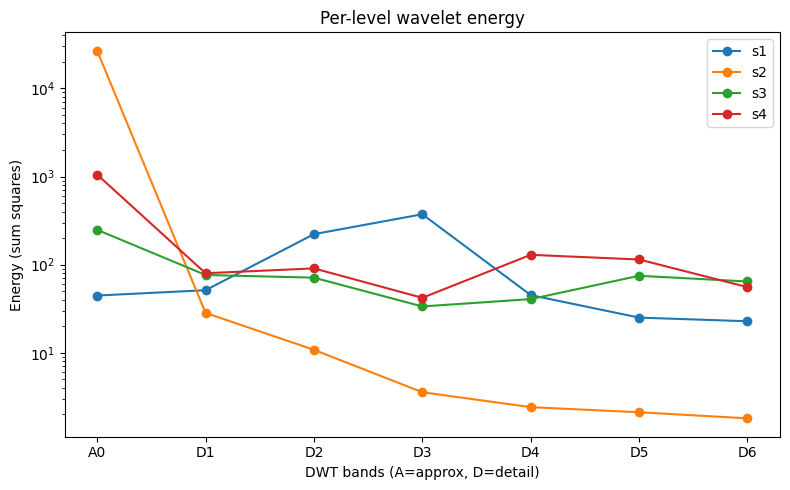

In [15]:
results = {name: decompose(v, wavelet='dmey', level=6) for name, v in series.items()}

# plot per-level energy (approx + details) for each series
plt.figure(figsize=(8,5))
# find max number of bands across series and build common x
max_bands = max(len(res['energies']) for res in results.values())
levels = range(max_bands)

# prepare padded energy arrays (pad with NaN so plotting keeps gaps)
for name, res in results.items():
    e = np.asarray(res['energies'])
    if len(e) < max_bands:
        e = np.pad(e, (0, max_bands - len(e)), constant_values=np.nan)
    plt.plot(levels, e, marker='o', label=name)

plt.xticks(levels, [f"A{0}" ] + [f"D{l}" for l in range(1, len(levels))])
plt.xlabel('DWT bands (A=approx, D=detail)')
plt.ylabel('Energy (sum squares)')
plt.yscale('log')
plt.title('Per-level wavelet energy')
plt.legend()
plt.tight_layout()

Pairwise Euclidean distances on detail-coeff vectors:
s1 <-> s2: 28.2104
s1 <-> s3: 34.1240
s1 <-> s4: 35.0760
s2 <-> s3: 20.4305
s2 <-> s4: 23.9592
s3 <-> s4: 29.7488


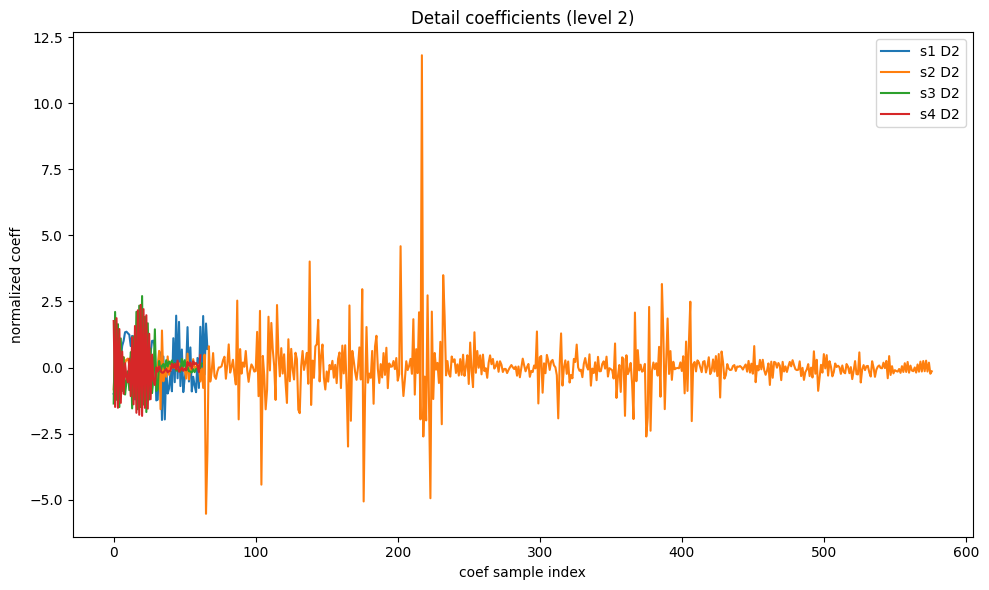

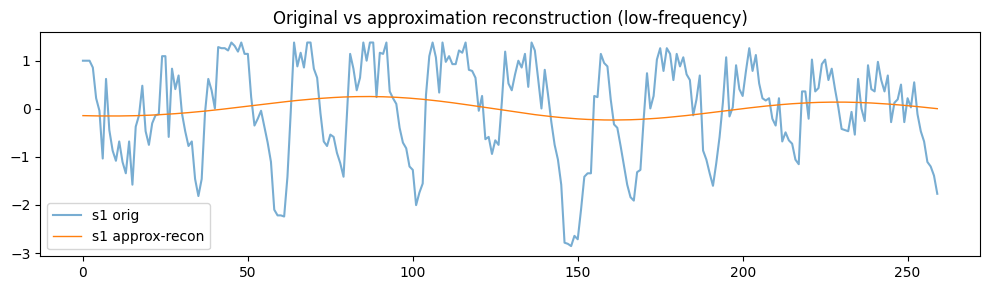

In [16]:
# pairwise distances on flattened detail coefficients
flat = {name: flatten_details(res['coeffs']) for name, res in results.items()}
# make vectors same length by trunc/pad
maxlen = max(map(len, flat.values()))
for name, v in flat.items():
    if len(v) < maxlen:
        flat[name] = np.pad(v, (0, maxlen - len(v)), mode='constant')
    else:
        flat[name] = v[:maxlen]

print("Pairwise Euclidean distances on detail-coeff vectors:")
for a, b in combinations(flat.keys(), 2):
    print(f"{a} <-> {b}: {euclidean(flat[a], flat[b]):.4f}")

# visualize detail coefficients for a chosen level (e.g. detail index 2)
detail_level = 2  # 1 = finest detail in pywt.wavedec order (coeffs[1])
plt.figure(figsize=(10,6))
for name, res in results.items():
    coeffs = res['coeffs']
    if len(coeffs) > detail_level:
        d = coeffs[detail_level]
        # normalize for plotting
        d = (d - np.mean(d)) / (np.std(d) + 1e-12)
        plt.plot(np.arange(len(d)), d, label=f"{name} D{detail_level}")
plt.xlabel('coef sample index')
plt.ylabel('normalized coeff')
plt.title(f'Detail coefficients (level {detail_level})')
plt.legend()
plt.tight_layout()

# optional: reconstruct signal from approximation or selected detail bands
# Example: reconstruct using only approximation (low-frequency)
name = 's1'
coeffs = results[name]['coeffs']
approx_only = [coeffs[0]] + [np.zeros_like(c) for c in coeffs[1:]]
recon_approx = pywt.waverec(approx_only, results[name]['wavelet'])
plt.figure(figsize=(10,3))
plt.plot(series[name], label=f'{name} orig', alpha=0.6)
plt.plot(recon_approx[:len(series[name])], label=f'{name} approx-recon', lw=1)
plt.legend()
plt.title('Original vs approximation reconstruction (low-frequency)')
plt.tight_layout()

Top combos by mean Euclidean distance:
wavelet  level  mean_euc  min_euc  mean_cos
   haar      6  4.239573 2.694179  1.312665
   haar      5  3.945642 2.691823  1.321163
    db2      5  3.856982 1.633593  1.294892
   haar      4  3.599829 2.599011  1.319169
    db2      4  3.509749 1.631314  1.288163
   haar      3  3.176547 1.967688  1.305946
    db4      3  3.170772 2.083179  1.297975
bior3.3      3  3.145564 2.129048  1.296718
   sym4      3  3.117396 1.557936  1.274129
    db2      3  3.085674 1.629472  1.271105

Top combos by minimum pairwise distance:
wavelet  level  mean_euc  min_euc  mean_cos
   haar      6  4.239573 2.694179  1.312665
   haar      5  3.945642 2.691823  1.321163
   haar      4  3.599829 2.599011  1.319169
bior3.3      3  3.145564 2.129048  1.296718
    db4      3  3.170772 2.083179  1.297975
bior3.3      2  2.736919 1.995805  1.299379
   haar      3  3.176547 1.967688  1.305946
    db4      2  2.723104 1.822929  1.295872
   haar      2  2.675926 1.669372  1.25

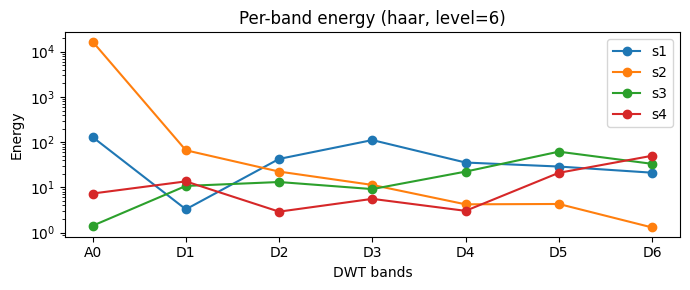

In [ ]:
from scipy.spatial.distance import pdist
# wavelet candidates to try
wavelets = ['haar','db2','db4','db8','sym4','coif3','bior3.3']
results_grid = []
names = list(series.keys())

for w in wavelets:
    # check max allowed level per series for this wavelet
    max_levels_per_series = []
    dec_len = pywt.Wavelet(w).dec_len
    for name in names:
        L = len(series[name])
        max_levels_per_series.append(pywt.dwt_max_level(L, dec_len))
    max_common_level = min(max_levels_per_series)
    if max_common_level < 1:
        continue
    for level in range(1, max_common_level+1):
        # build feature matrix: per-band energies (A0, D1..Dlevel) => length level+1
        feats = []
        valid = True
        for name in names:
            x = series[name]
            try:
                coeffs = pywt.wavedec(x, w, level=level)
            except Exception:
                valid = False
                break
            energies = np.array([np.sum(c**2) for c in coeffs])  # len = level+1
            feats.append(energies)
        if not valid:
            continue
        F = np.vstack(feats)  # shape (n_series, level+1)
        # optional: normalize features per-band (zero-mean / unit) to avoid scale bias
        Fz = (F - np.nanmean(F, axis=0)) / (np.nanstd(F, axis=0) + 1e-12)
        dists = pdist(Fz, metric='euclidean')
        mean_dist = np.mean(dists)
        min_dist = np.min(dists)
        # also compute pairwise cosine mean (optional)
        cos_mean = np.mean(pdist(Fz, metric='cosine'))
        results_grid.append({'wavelet': w, 'level': level,
                             'mean_euc': float(mean_dist), 'min_euc': float(min_dist),
                             'mean_cos': float(cos_mean)})

# collect and show top candidates by mean_euc and by min_euc
df_scores = pd.DataFrame(results_grid)
if df_scores.empty:
    print("No valid wavelet/level combos (series too short for chosen wavelets).")
else:
    df_scores = df_scores.sort_values(['mean_euc','min_euc'], ascending=False).reset_index(drop=True)
    print("Top combos by mean Euclidean distance:")
    print(df_scores.head(10).to_string(index=False))
    print("\nTop combos by minimum pairwise distance:")
    print(df_scores.sort_values('min_euc', ascending=False).head(10).to_string(index=False))

# Quick plot: show per-band energies for the best combo (first row)
if not df_scores.empty:
    best = df_scores.iloc[0]
    print(f"\nPlotting energies for best combo: {best['wavelet']} level={int(best['level'])}")
    w = best['wavelet']; level = int(best['level'])
    plt.figure(figsize=(7,3))
    max_bands = level+1
    for name in names:
        coeffs = pywt.wavedec(series[name], w, level=level)
        e = np.array([np.sum(c**2) for c in coeffs])
        if len(e) < max_bands:
            e = np.pad(e, (0, max_bands - len(e)), constant_values=np.nan)
        plt.plot(range(max_bands), e, marker='o', label=name)
    labels = ['A0'] + [f'D{l}' for l in range(1, max_bands)]
    plt.xticks(range(max_bands), labels)
    plt.yscale('log')
    plt.xlabel('DWT bands')
    plt.ylabel('Energy')
    plt.title(f'Per-band energy ({w}, level={level})')
    plt.legend()

## 3. Wavelets in groundwater test dataset

In [2]:
import pickle
with open(f"../../data/1188_sample_migrated_GLD_dino+bro.pkl", 'rb') as f:
    data = pickle.load(f)
data_obs = data['data']

### 3.0 Understanding the function and its outputs

In [3]:
import wavelet_fingerprint
import numpy as np
a_gld = next(iter(data_obs.keys()))
dino_ts = data_obs[a_gld]['dino']
bro_ts = data_obs[a_gld]['bro']
fp_dino = wavelet_fingerprint.compute_fingerprint(dino_ts[:, 0], dino_ts[:, 1])
fp_bro = wavelet_fingerprint.compute_fingerprint(bro_ts[:, 0], bro_ts[:, 1])

In [6]:
fp_dino

{'vector': array([ 6.50172921e-01,  2.00498546e+00,  9.28571429e-01,  1.52305425e-01,
         8.60949452e-01,  9.28571429e-01,  5.92626028e-02,  4.48752197e-01,
         6.36363636e-01,  1.14303177e-01,  4.54983556e-01,  3.15789474e-01,
         2.13470509e-02,  1.39718598e-01,  1.42857143e-02,  2.33601952e-03,
         2.74639657e-02,  1.50375940e-02,  2.72803897e-04,  5.62904611e-03,
         3.08880309e-01, -1.79473684e-01,  4.30089428e-01,  1.85745891e-03,
        -9.99714503e-01, -6.98000000e-01, -5.20000000e-01, -1.90000000e-01,
         2.30000000e-01,  4.02000000e-01,  1.97700000e+03,  1.99600000e+03,
         6.89344792e+03,  5.70000000e+01,  1.06500000e+02,  1.07142857e-01,
         1.72557959e+00,  2.35726570e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]),
 'features': {'n_points': 57,
  'start_year': 1977,
  'end_year': 1996,
  'span_days': 6893.447916666666,
  'median_dt_days': 106.5,
  'min_dt_days': 12.930555555555657,
  'max_dt_days': 546.90625,
  'pc

In [7]:
# calculate difference between vector fingerprint dino and bro
np.linalg.norm(fp_dino['vector'] - fp_bro['vector'])

np.float64(0.5000084961499497)

In [4]:
# calculate cosine distance between vector fingerprint dino and bro
from scipy.spatial.distance import cosine
cosine(fp_dino['vector'], fp_bro['vector'])

np.float64(3.2185165643738856e-10)

### 3.1 Distance between DINO-BRO pairs
We know this are 100% matches (i.e. the same time-series migrated from DINO -> BRO)

In [32]:
# Loop trough the data
norm_distance_bro_dino_pairs, cos_distance_bro_dino_pairs, len_fp = [], [], []
too_short, lots_of_gaps, is_roughly_constant = 0, 0, 0
for i, gld in enumerate(data_obs.keys()):
    dino_ts = data_obs[gld]['dino']
    bro_ts = data_obs[gld]['bro']
    # time-series normalization
    dino_ts[:, 1] = (dino_ts[:, 1] - np.mean(dino_ts[:, 1])) / np.std(dino_ts[:, 1])
    bro_ts[:, 1] = (bro_ts[:, 1] - np.mean(bro_ts[:, 1])) / np.std(bro_ts[:, 1])

    fp_dino = wavelet_fingerprint.compute_fingerprint(dino_ts[:, 0], dino_ts[:, 1])
    fp_bro = wavelet_fingerprint.compute_fingerprint(bro_ts[:, 0], bro_ts[:, 1])
    norm_distance_bro_dino_pairs.append(np.linalg.norm(fp_dino['vector'] - fp_bro['vector']))
    cos_distance_bro_dino_pairs.append(cosine(fp_dino['vector'], fp_bro['vector']))
    len_fp.append(len(fp_dino['vector']))
    if len(fp_dino['vector']) == 23: 
        print(f"GLD {gld} has fingerprint length 23, length of time series: {len(dino_ts)}, flag too_short: {fp_dino['flags']['too_short']}") 

    if fp_dino['flags']['too_short']: too_short += 1
    if fp_dino['flags']['lots_of_gaps']: lots_of_gaps += 1
    if fp_dino['flags']['is_roughly_constant']: is_roughly_constant += 1

GLD GLD000000075463 has fingerprint length 23, length of time series: 21, flag too_short: True
GLD GLD000000078241 has fingerprint length 23, length of time series: 9, flag too_short: True
GLD GLD000000078265 has fingerprint length 23, length of time series: 2, flag too_short: True
GLD GLD000000055760 has fingerprint length 23, length of time series: 4, flag too_short: True
GLD GLD000000080081 has fingerprint length 23, length of time series: 5, flag too_short: True
GLD GLD000000055910 has fingerprint length 23, length of time series: 8, flag too_short: True
GLD GLD000000074391 has fingerprint length 23, length of time series: 11, flag too_short: True
GLD GLD000000077971 has fingerprint length 23, length of time series: 5, flag too_short: True
GLD GLD000000080587 has fingerprint length 23, length of time series: 7, flag too_short: True
GLD GLD000000109954 has fingerprint length 23, length of time series: 7, flag too_short: True
GLD GLD000000036701 has fingerprint length 23, length of t

Statistics of norm of the distance between bro and dino pairs:
Mean: 0.08818062904192706 ± Std: 0.3106470013985418
Median: 0.00014559693598237476
Max: 6.273544856110389, Min: 0.0

Statistics of cosine distance between bro and dino pairs:
Mean: 1.658000806793806e-09 ± Std: 3.7140782049867336e-08
Median: 2.220446049250313e-16
Max: 1.154608008868685e-06, Min: 0.0

Fingerprint vector length: Mean: 40.63636363636363 ± Std: 2.5324342322152944
Fingerprint vector length: Min: 23, Max: 41

Data quality flags across test dataset:
Series flagged as too_short (< min_points_for_wavelet=10): 24 (2.02%)
Series flagged as lots_of_gaps (NaN > nan_frac_threshold=0.3): 111 (9.34%)
Series flagged as is_roughly_constant: 0 (0.00%)


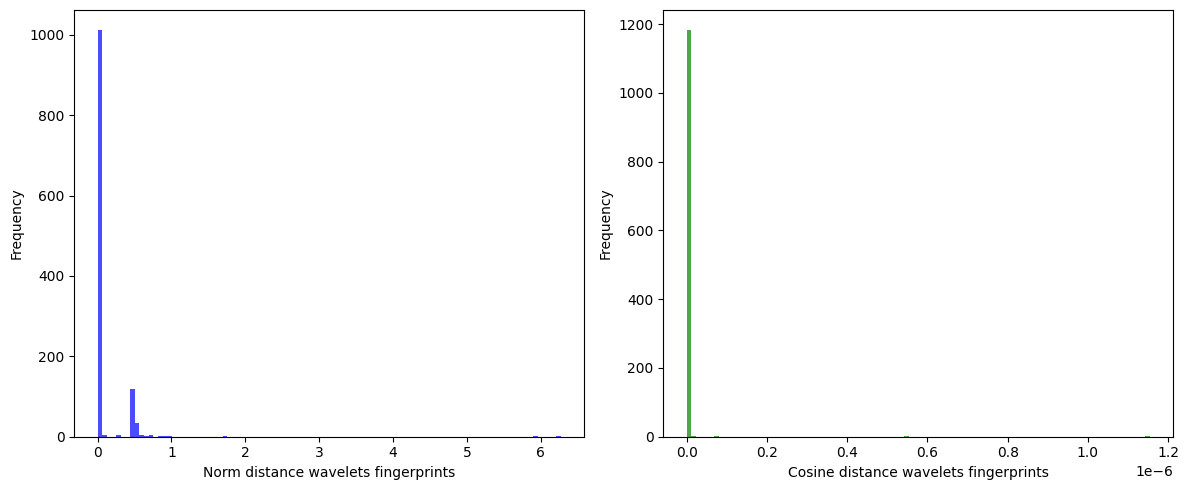

In [23]:
# Statistics
print(f"Statistics of norm of the distance between bro and dino pairs:")
print(f"Mean: {np.mean(norm_distance_bro_dino_pairs)} ± Std: {np.std(norm_distance_bro_dino_pairs)}")
print(f"Median: {np.median(norm_distance_bro_dino_pairs)}")
print(f"Max: {np.max(norm_distance_bro_dino_pairs)}, Min: {np.min(norm_distance_bro_dino_pairs)}")

print(f"\nStatistics of cosine distance between bro and dino pairs:")
print(f"Mean: {np.mean(cos_distance_bro_dino_pairs)} ± Std: {np.std(cos_distance_bro_dino_pairs)}")
print(f"Median: {np.median(cos_distance_bro_dino_pairs)}")
print(f"Max: {np.max(cos_distance_bro_dino_pairs)}, Min: {np.min(cos_distance_bro_dino_pairs)}")

print(f"\nFingerprint vector length: Mean: {np.mean(len_fp)} ± Std: {np.std(len_fp)}")
print(f"Fingerprint vector length: Min: {np.min(len_fp)}, Max: {np.max(len_fp)}")

print(f"\nData quality flags across test dataset:")
print(f"Series flagged as too_short (< min_points_for_wavelet=10): {too_short} ({100 * too_short / len(data_obs):.2f}%)")
# NaN arise from uniforming spacing the time-series, not from our data
print(f"Series flagged as lots_of_gaps (NaN > nan_frac_threshold=0.3): {lots_of_gaps} ({100 * lots_of_gaps / len(data_obs):.2f}%)")
print(f"Series flagged as is_roughly_constant: {is_roughly_constant} ({100 * is_roughly_constant / len(data_obs):.2f}%)")

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
axes[0].hist(norm_distance_bro_dino_pairs, bins=100, color='blue', alpha=0.7)
axes[0].set_xlabel("Norm distance wavelets fingerprints")
axes[0].set_ylabel("Frequency")

axes[1].hist(cos_distance_bro_dino_pairs, bins=100, color='green', alpha=0.7)
axes[1].set_xlabel("Cosine distance wavelets fingerprints")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

In [21]:
print(len_fp.count(41))
print(len_fp.count(23))

1164
24


### 3.2 Distance between two random time-series

In [5]:
import random
gld_1 = random.choice(list(data_obs.keys()))
gld_2 = random.choice(list(data_obs.keys()))
dino_ts = data_obs[gld_1]['dino']
bro_ts = data_obs[gld_2]['bro']
dino_ts[:, 1] = (dino_ts[:, 1] - np.mean(dino_ts[:, 1])) / np.std(dino_ts[:, 1])
bro_ts[:, 1] = (bro_ts[:, 1] - np.mean(bro_ts[:, 1])) / np.std(bro_ts[:, 1])
fp_dino = wavelet_fingerprint.compute_fingerprint(dino_ts[:, 0], dino_ts[:, 1])
fp_bro = wavelet_fingerprint.compute_fingerprint(bro_ts[:, 0], bro_ts[:, 1])
dist = np.linalg.norm(fp_dino['vector'] - fp_bro['vector'])
cos_dist = cosine(fp_dino['vector'], fp_bro['vector'])
print(f"Norm distance between random pair {gld_1} and {gld_2}: {dist}")
print(f"Cosine distance between random pair {gld_1} and {gld_2}: {cos_dist}")

Norm distance between random pair GLD000000060784 and GLD000000077222: 4036.3844566624402
Cosine distance between random pair GLD000000060784 and GLD000000077222: 0.020320574472693975


### 3.3. Performance on non-matching sequences

In [26]:
from scipy.spatial.distance import cosine
cos_distance_nonmatching, norm_nonmatching, gld_pairs_nonmatching = [], [], []
max_pairs = 1000  # pick how many non-matching pairs you want
seen = set()
while len(gld_pairs_nonmatching) < max_pairs:
    g1, g2 = random.sample(list(data_obs.keys()), 2)  # ensures g1 != g2
    if (g1, g2) in seen: continue
    
    dino_ts = data_obs[g1]['dino']
    bro_ts = data_obs[g2]['bro']
    # normalization
    dino_ts[:, 1] = (dino_ts[:, 1] - np.mean(dino_ts[:, 1])) / np.std(dino_ts[:, 1])
    bro_ts[:, 1] = (bro_ts[:, 1] - np.mean(bro_ts[:, 1])) / np.std(bro_ts[:, 1])
    
    if len(dino_ts) < 25 or len(bro_ts) < 25: continue  # skip too short series
    fp_dino = wavelet_fingerprint.compute_fingerprint(dino_ts[:, 0], dino_ts[:, 1])
    fp_bro = wavelet_fingerprint.compute_fingerprint(bro_ts[:, 0], bro_ts[:, 1])
    norm_nonmatching.append(np.linalg.norm(fp_dino['vector'] - fp_bro['vector']))
    cos_distance_nonmatching.append(cosine(fp_dino['vector'], fp_bro['vector']))
    gld_pairs_nonmatching.append((g1, g2))
    seen.add((g1, g2))

Statistics of norm distances between wavelet fingerprints of non-matching bro and dino pairs:
Mean: 5298.690617303304 ± Std: 4452.366757132054
Median: 4028.1557848673206
Max: 30916.079412215862, Min: 16.15387904041939

Statistics of Cosine distances between wavelet fingerprints of non-matching bro and dino pairs:
Mean: 0.13281303798396352 ± Std: 0.16361403569395372
Median: 0.05524179686523828
Max: 0.7936387403174702, Min: 2.2118891083167114e-06


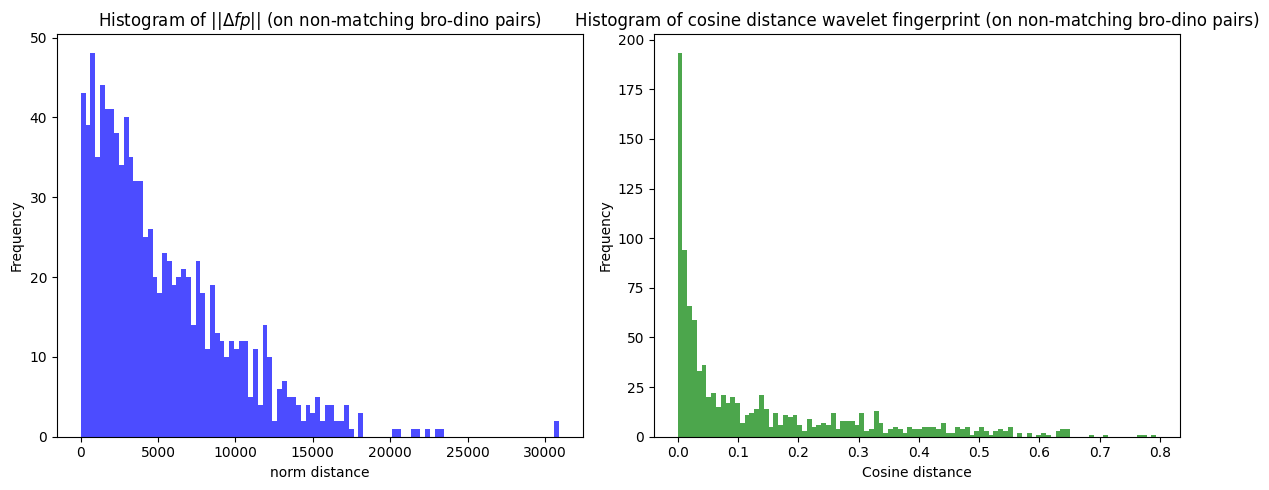

In [31]:
# Statistics
print(f"Statistics of norm distances between wavelet fingerprints of non-matching bro and dino pairs:")
print(f"Mean: {np.mean(norm_nonmatching)} ± Std: {np.std(norm_nonmatching)}")
print(f"Median: {np.median(norm_nonmatching)}")
print(f"Max: {np.max(norm_nonmatching)}, Min: {np.min(norm_nonmatching)}")

print(f"\nStatistics of Cosine distances between wavelet fingerprints of non-matching bro and dino pairs:")
print(f"Mean: {np.mean(cos_distance_nonmatching)} ± Std: {np.std(cos_distance_nonmatching)}")
print(f"Median: {np.median(cos_distance_nonmatching)}")
print(f"Max: {np.max(cos_distance_nonmatching)}, Min: {np.min(cos_distance_nonmatching)}")


fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
axes[0].hist(norm_nonmatching, bins=100, color='blue', alpha=0.7)
axes[0].set_xlabel("norm distance")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of $||\\Delta fp||$ (on non-matching bro-dino pairs)")
axes[1].hist(cos_distance_nonmatching, bins=100, color='green', alpha=0.7)
axes[1].set_xlabel("Cosine distance")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of cosine distance wavelet fingerprint (on non-matching bro-dino pairs)")

plt.tight_layout()
plt.show()

**Conclusions**
- For this data, the fingerprint vector has mostly size 41, sometimes size 23 (means short time-series and wavelet decomposition cannot be performed).
- The default values seem to work well, but there might be room for improvement tweaking those.

### 3.3 Distance between windows
Instead of comparing the time-series completely, one can compare parts of them. The difference will be on the inputs to the function, also being careful of having the windows big enough for the method to be able to resample.